In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [3]:
def softmax(z):
    expz = np.exp(z)
    return expz/np.sum(expz)

In [4]:
def sigmoiddif(sigma):
    return sigma*(1 - sigma)

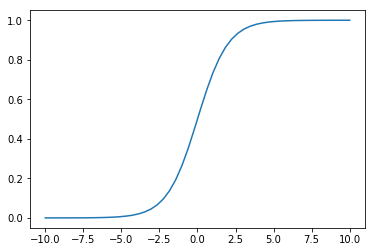

In [5]:
xx = np.linspace(-10, 10)
yy = sigmoid(xx)
plt.plot(xx, yy)
pass

In [6]:
def NeuralNetPredict(X, W, w, V, v):
    N, d = X.shape
    K, m1 = V.shape
    Y = np.zeros((N, K))
    for i in range(N):
        x = X[i, :]
        y = softmax(V.dot(sigmoid(W.dot(x) + w)) + v)
        Y[i, :] = y
    return Y        

In [7]:
def NeuralNetFit(X, Y, rho = 1, nepoch = 1000, m1 = 10):
    N, d = X.shape
    N, K = Y.shape
    
    W = np.random.randn(m1, d)
    V = np.random.randn(K, m1)
    w = np.random.randn(m1)
    v = np.random.randn(K)

    for epoch in range(nepoch):
        for i in range(N):
            x = X[i, :]
            y = Y[i, :]

            # Neural Net Forward
            s = W @ x + w
            z = sigmoid(s)
            t = V @ z + v
            g = softmax(t)
        
            # Neural Net Backward
            delta_t = g - y
            delta_z = delta_t @ V
            delta_s = delta_z*sigmoiddif(z)
            #delta_x = delta_s.dot(W)
        
            W = W - rho*np.outer(delta_s, x)        
            V = V - rho*np.outer(delta_t, z)        
            w = w - rho*delta_s        
            v = v - rho*delta_t        
        
    return W, w, V, v     

In [8]:
X_train = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y_train = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])
np.hstack([X_train, Y_train])

array([[0, 0, 1, 0],
       [1, 0, 0, 1],
       [0, 1, 0, 1],
       [1, 1, 1, 0]])

In [9]:
W, w, V, v = NeuralNetFit(X_train, Y_train)

In [10]:
NeuralNetPredict(X_train, W, w, V, v)

array([[9.99519972e-01, 4.80028243e-04],
       [9.59513275e-04, 9.99040487e-01],
       [6.57190570e-04, 9.99342809e-01],
       [9.98762659e-01, 1.23734102e-03]])

In [11]:
ngrid = 100
X1grid, X2grid = np.meshgrid(np.linspace(-.25, 1.25, ngrid), np.linspace(-1, 2, ngrid))
X1X2 = np.vstack((X1grid.flatten(), X2grid.flatten())).T

In [12]:
Ygrid = NeuralNetPredict(X1X2, W, w, V, v)
Ygrid = Ygrid[:, 1].reshape((ngrid, ngrid))

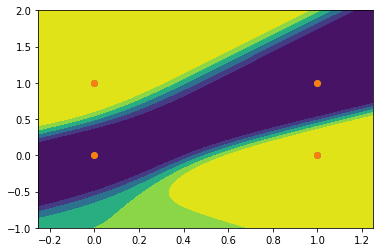

In [13]:
plt.contourf(X1grid, X2grid, Ygrid, [0,.1,.25,.5,.75,.9,1])
plt.plot(X_train, Y_train, 'o')
pass